# Cars24.com

In [1]:
#Import required modules
from bs4 import BeautifulSoup
import pandas as pd
import time
import warnings
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def clean_cars(cars):
    year, company, name=[],[],[]
    for car in cars:
        year.append(car[:4])
        company.append(car.split()[1])
        name.append(car[5:])
    return year, company, name

def clean_name(names):
    name=[]
    for n in names:
        comp = n.split()[0] + " "
        name.append(n.replace(comp,""))
    return name

def clean_models(names):
    models, types=[],[]
    for name in names:
        types.append(name.split()[-1])
        models.append((name.replace(name.split()[-1],"")).strip())
    return models, types

def clean_prices(price):
    new=[]
    for p in price:
        p=p.replace('₹','')
        new.append(p.replace(',',''))
    return new

def split_features(features):
    km, owner, fuel= [], [], []
    for feature in features:
        feat = feature.split(" ")
        km.append(feat[0])
        owner.append(feat[1])
        fuel.append(feat[2])
    
    return km, owner, fuel

def clean_km(km):
    kms=[]
    for k in km:
        kms.append(k.replace(',',''))
    return kms

def clean_owner(owner):
    own=[]
    for o in owner:
        own.append(o[2])
    return own

def clean_fuel(fuel):
    fuels=[]
    for f in fuel:
        fuels.append(f[5])
    return fuels

def scroll(driver, initialScroll, finalScroll):
    initialScroll = 0
    finalScroll = 1000

    while True:
        driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")

        initialScroll = finalScroll
        finalScroll += 1000

        end = time.time()

        if round(end - start) > 20:
            break

In [3]:
#Initializing the web chrome driver and scrolling to load the page
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.cars24.com/buy-used-cars-bengaluru/")
driver.maximize_window()

start = time.time()

scroll(driver, 0, 1000)

src = driver.page_source
driver.close()

In [4]:
#Initializing BeautifulSoup with HTML page
soup = BeautifulSoup(src)

In [5]:
#Getting car feature
car_tags = soup.find_all('h2', {'class':'_3FpCg'})
cars = []
for tag in car_tags:
    cars.append(tag.text)
    
year, company, name = clean_cars(cars)
name = clean_name(name)

In [6]:
#Getting price feature
price_tags = soup.find_all('div', {'class':'_7udZZ'})
prices=[]
for tag in price_tags:
    prices.append(tag.text)
    
prices=clean_prices(prices)

In [7]:
#Getting model feature
model_tags = soup.find_all('p', {'class':'cvakB'})
models = []
for tag in model_tags:
    models.append(tag.text)
    
models, types = clean_models(models)

In [8]:
#Getting features of car feature
features_tags = soup.find_all('ul', {'class':'bVR0c'})
features = []
for tag in features_tags:
    features.append(tag.text)
    
km, owner, fuel = split_features(features)
km, owner, fuel = clean_km(km), clean_owner(owner), clean_fuel(fuel)

In [9]:
#Creating a dictionary to arrange the features
details = {
    "company": company,
    "name": name,
    "models": models,
    "gear": types,
    "year": year,
    "kms": km,
    "owner": owner,
    "fuel": fuel,
    "price": prices,
}

In [10]:
#Creating a Dataframe
df= pd.DataFrame(details)

In [11]:
#Checking the shape
df.shape

(485, 9)

In [12]:
#Checking the first 5 rows of data
df.head()

,company,name,models,gear,year,kms,owner,fuel,price
0,Maruti,Baleno,ZETA 1.2 K12,Manual,2016,34417,1,P,640799
1,Maruti,Baleno,ZETA 1.2 K12,Manual,2016,25849,1,P,640799
2,Hyundai,i20,SPORTZ 1.2 O,Manual,2010,32395,1,P,405299
3,Maruti,Swift Dzire,VXI 1.2 BS IV,Manual,2014,49515,1,P,451399
4,Volkswagen,Polo,COMFORTLINE 1.0 PETROL,Manual,2018,30201,1,P,619099


In [13]:
#Checking value types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  485 non-null    object
 1   name     485 non-null    object
 2   models   485 non-null    object
 3   gear     485 non-null    object
 4   year     485 non-null    object
 5   kms      485 non-null    object
 6   owner    485 non-null    object
 7   fuel     485 non-null    object
 8   price    485 non-null    object
dtypes: object(9)
memory usage: 34.2+ KB


In [14]:
#Changing some features to integer
df.year, df.kms, df.owner, df.price = df.year.astype(int), df.kms.astype(int), df.owner.astype(int), df.price.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  485 non-null    object
 1   name     485 non-null    object
 2   models   485 non-null    object
 3   gear     485 non-null    object
 4   year     485 non-null    int32 
 5   kms      485 non-null    int32 
 6   owner    485 non-null    int32 
 7   fuel     485 non-null    object
 8   price    485 non-null    int32 
dtypes: int32(4), object(5)
memory usage: 26.6+ KB


In [15]:
#Checking the unique values
df.apply(lambda x: len(x.unique()))

company     15
name        67
models     186
gear         9
year        14
kms        482
owner        4
fuel         2
price      379
dtype: int64

In [16]:
#Checking null values
df.isnull().sum()

company    0
name       0
models     0
gear       0
year       0
kms        0
owner      0
fuel       0
price      0
dtype: int64

In [17]:
#Checking duplicate entries
df.duplicated().sum()

0

In [18]:
#Checking dataset before moving to EDA
df.head()

,company,name,models,gear,year,kms,owner,fuel,price
0,Maruti,Baleno,ZETA 1.2 K12,Manual,2016,34417,1,P,640799
1,Maruti,Baleno,ZETA 1.2 K12,Manual,2016,25849,1,P,640799
2,Hyundai,i20,SPORTZ 1.2 O,Manual,2010,32395,1,P,405299
3,Maruti,Swift Dzire,VXI 1.2 BS IV,Manual,2014,49515,1,P,451399
4,Volkswagen,Polo,COMFORTLINE 1.0 PETROL,Manual,2018,30201,1,P,619099


## Exploratory Data Analysis

Text(0.5, 1.0, 'No. of Cars by Company')

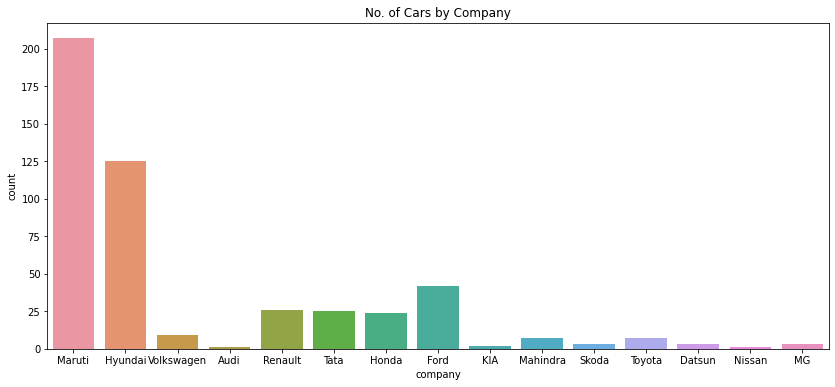

In [19]:
#Countplot for cars by company
plt.figure(figsize=(14,6))
sns.countplot(df.company)
plt.title('No. of Cars by Company')

Text(0.5, 1.0, 'No. of Cars by Year')

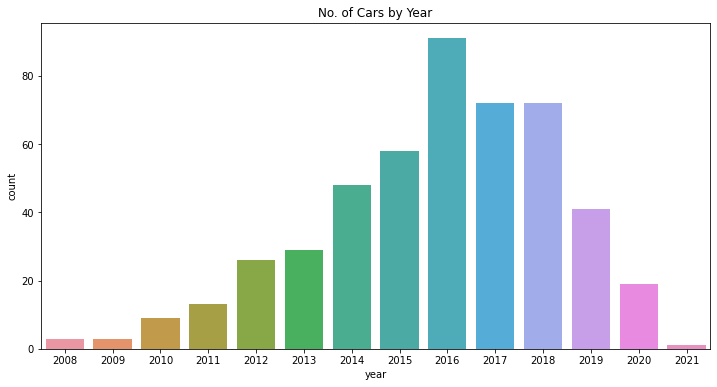

In [20]:
#Countplot for cars by years
plt.figure(figsize=(12,6))
sns.countplot(df.year)
plt.title('No. of Cars by Year')

<AxesSubplot:xlabel='kms'>

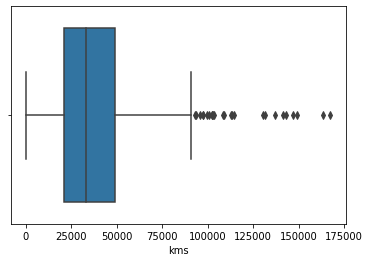

In [21]:
#Boxplot for cars by kms
sns.boxplot(df.kms)

<AxesSubplot:xlabel='owner', ylabel='count'>

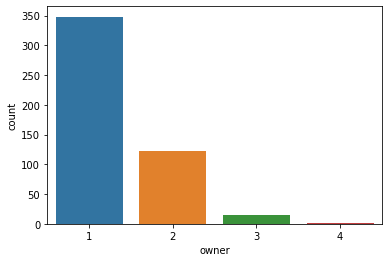

In [22]:
#Countplot for cars by no. of owners used the cars before
sns.countplot(df.owner)

<AxesSubplot:xlabel='fuel', ylabel='count'>

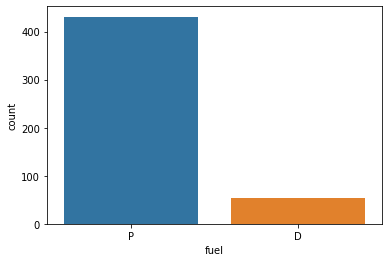

In [23]:
#Countplot for cars by fuel
sns.countplot(df.fuel)

<AxesSubplot:xlabel='kms', ylabel='price'>

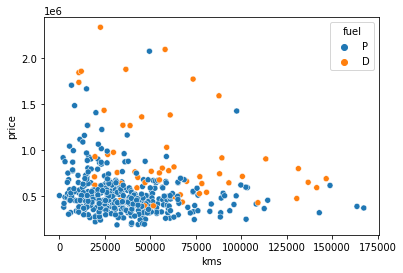

In [24]:
#Scatterplot for cars kms v/s price with fuel as hue
sns.scatterplot( data=df, x="kms", y="price", hue="fuel")

<AxesSubplot:xlabel='year', ylabel='price'>

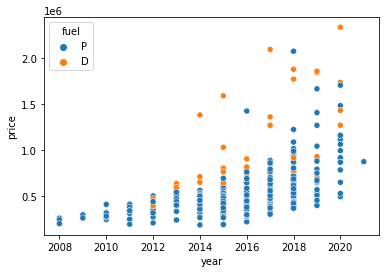

In [25]:
#Scatterplot for cars year v/s price with fuel as hue
sns.scatterplot( data=df, x="year", y="price", hue="fuel")

## Export Dataset

In [26]:
#Exporting as csv
df.to_csv("cars24.csv")